In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  

In [2]:
def func(y, t):

  """
  This is the function that takes in position, velocity vectors and a time range. 
  It give output which is a list of the time derivative of velocity in three different directions,
  using the Lorentz equation.
  We can call this function as an input when we use the odeint function later.
  """

  # y is the list [rx, ry, rz, vx, vy, vz]
  # rx, ry, rz are position components
  # vx, vy, vz are the velocity components
  # t is the time
  # we can see the output of this function in cell 3, and use it in odeint function to solve the differential equation

  q = 1    # if we use the actual value of q, the output figure is difficult to visualize.
  m = 1    # the same reason as q, for ideal visualization 

  # defining the vectors for electric and magnetic field
  B = np.array((0, 0, 1))
  E = np.array((0, 0.01, 0))

  # velocity components
  vx = y[3]   # third element of list y
  vy = y[4]   # fourth element of list y
  vz = y[5]   # fifth element of list y 
  v = y[3:]   # from the third element to the end of list y

  # now, we calculate the values of the time derivative of the velocity (dvdt) from the Lorentz equation
  dvdt = (q/m)*(E + np.cross(v, B))

  # here are the dv/dt for each v
  vx1 = dvdt[0]     # this is the time derivative of the velocity in x direction (d(vx)/dt), 1 represents the first derivative
  vy1 = dvdt[1]     # in y direction (d(vy)/dt)
  vz1 = dvdt[2]     # in z direction (d(vz)/dt)

  # this function outputs this
  return [vx, vy, vz, vx1, vy1, vz1]

In [3]:
# let us define a time range over which we want to calculate the particles movements
t = np.arange(0, 100, 0.1) # time range from 0 to 100 seconds, int the step of 0.1s

# this is the initial condition, the initial position is (0,0,0) and the initial velocities are d(vx)/dt= 0.1, d(vy)/dt=0.1 and d(vz)/dt=0.1 
y0 = [0, 0, 0, 0.1, 0.1, 0.1]  

# now we apply odeint which solves the differential equation
solution = odeint(func, y0, t)  

In [4]:
solution 
# this is the solution that odeint gives us. it is an array which has 1000 elements, each one with six sub-elements.
# among these six elements, the first three are the position components and the last three are the velocity components.

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e-01,  1.00000000e-01,  1.00000000e-01],
       [ 1.04845925e-02,  9.53372756e-03,  1.00000000e-02,
         1.09533728e-01,  9.05154075e-02,  1.00000000e-01],
       [ 2.18735859e-02,  1.80729369e-02,  2.00000000e-02,
         1.18072937e-01,  8.01264141e-02,  1.00000000e-01],
       ...,
       [ 9.63112951e-01, -1.03187279e-01,  9.97000000e+00,
        -3.18727926e-03,  1.33887049e-01,  1.00000000e-01],
       [ 9.63465299e-01, -8.97550014e-02,  9.98000000e+00,
         1.02449986e-02,  1.34534701e-01,  1.00000000e-01],
       [ 9.65161872e-01, -7.63251700e-02,  9.99000000e+00,
         2.36748300e-02,  1.33838128e-01,  1.00000000e-01]])

In [5]:
# we want to separate the position components into three separate lists

xlist = [] # for x coordinates
ylist = [] # for y coordinates
zlist = [] # for z coordinates

# we loop over the entire y, and pick out the position values and add them the empty lists we created above
for i in range(1000):
  x = solution[i][0]
  xlist.append(x)
  y = solution[i][1]
  ylist.append(y)
  z = solution[i][2]
  zlist.append(z)
  i += 1

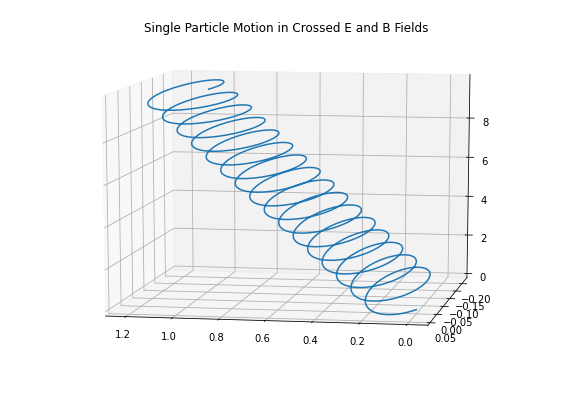

In [7]:
# plot
ax = plt.figure(figsize=(10, 7)).add_subplot(projection='3d')
ax.view_init(elev=10., azim=100)
ax.plot(xlist, ylist, zlist)
ax.set_title("Single Particle Motion in Crossed E and B Fields")
plt.show()